In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#import warnings
%matplotlib inline

In [2]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = [12.0,8.0]

In [3]:
df = pd.read_csv('../data/train.csv')

In [4]:
df.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0


# Completo datos faltantes del DataFrame

Completo el dataframe con los datos faltantes en las columnas de m² (`metrostotales` y `metroscubiertos`).
Si no tengo una de las dos, reemplazo con el valor de la otra. Si tengo ambos, no hago nada. Si no tengo ninguna, filtro dicha propiedad del análisis.

In [5]:
props_a_filtrar = df.loc[df['metroscubiertos'].isna() & df['metrostotales'].isna()][['metrostotales', 'metroscubiertos']].size

print(f'Hay que filtrar {props_a_filtrar} propiedades ya que no hay datos de m²')

Hay que filtrar 0 propiedades ya que no hay datos de m²


In [6]:
df[['metrostotales', 'metroscubiertos']].isna().sum()

metrostotales      51467
metroscubiertos    17400
dtype: int64

In [7]:
df['metrostotales'].fillna(df['metroscubiertos'], inplace=True)
df['metroscubiertos'].fillna(df['metrostotales'], inplace=True)

In [8]:
df[['metrostotales', 'metroscubiertos']].isna().sum()

metrostotales      0
metroscubiertos    0
dtype: int64

In [9]:
df['precioUSD'] = df['precio'] / 20
df['preciom2USD'] = df['precioUSD'] / df['metrostotales']

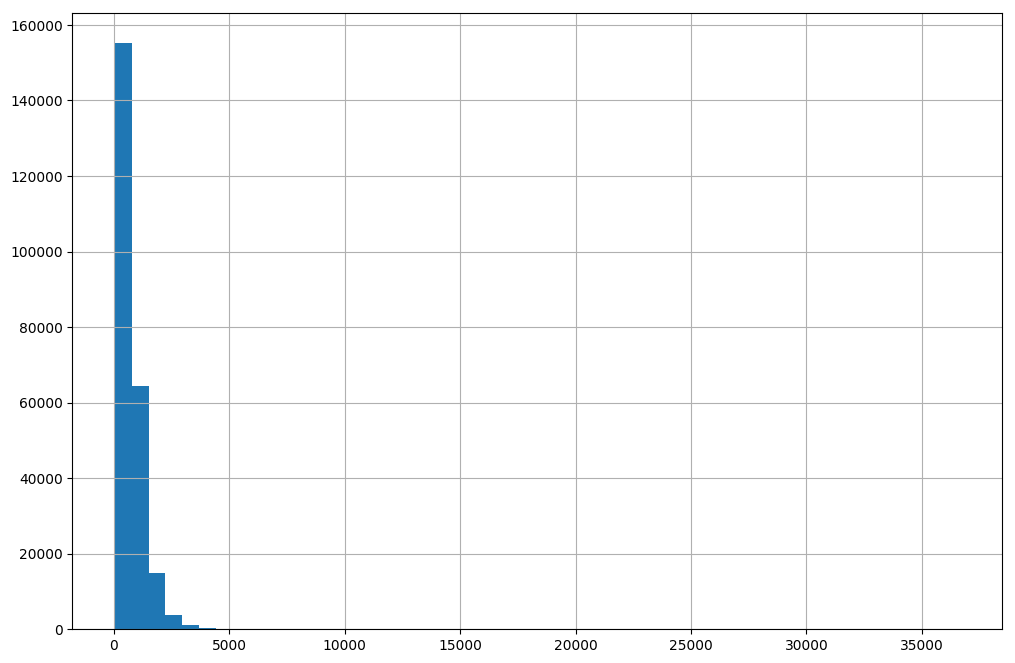

In [10]:
df['preciom2USD'].hist(bins=50);

In [11]:
df.describe(percentiles=[0.01, 0.05, 0.1, 0.9, 0.95, 0.99, 0.995, 0.999]).T

,count,mean,std,min,1%,5%,10%,50%,90%,95%,99%,99.5%,99.9%,max
id,240000.0,1.499694e+05,8.663458e+04,1.000000,3013.990000,14998.950000,29932.800000,1.498755e+05,2.700371e+05,2.850670e+05,2.970520e+05,2.985380e+05,2.997250e+05,2.999990e+05
antiguedad,196445.0,8.116114e+00,9.553830e+00,0.000000,0.000000,0.000000,0.000000,5.000000e+00,2.000000e+01,2.600000e+01,4.500000e+01,5.000000e+01,6.000000e+01,8.000000e+01
habitaciones,217529.0,2.902326e+00,8.968942e-01,1.000000,1.000000,2.000000,2.000000,3.000000e+00,4.000000e+00,4.000000e+00,6.000000e+00,7.000000e+00,1.000000e+01,1.000000e+01
garages,202235.0,1.546874e+00,8.535075e-01,0.000000,0.000000,0.000000,0.000000,2.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00
banos,213779.0,2.132417e+00,9.125460e-01,1.000000,1.000000,1.000000,1.000000,2.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
metroscubiertos,240000.0,1.803458e+02,1.010691e+02,15.000000,43.000000,56.000000,65.000000,1.600000e+02,3.360000e+02,3.800000e+02,4.200000e+02,4.300000e+02,4.370000e+02,4.390000e+02
metrostotales,240000.0,1.771770e+02,9.853175e+01,15.000000,43.000000,60.000000,68.000000,1.520000e+02,3.300000e+02,3.800000e+02,4.200000e+02,4.300000e+02,4.370000e+02,4.390000e+02
idzona,211379.0,2.423468e+06,1.056794e+07,22.000000,2485.000000,15160.000000,23533.000000,5.638300e+04,2.767410e+05,3.430150e+05,5.000400e+07,5.000400e+07,5.000400e+07,5.000400e+07
lat,116512.0,2.069682e+01,3.137884e+00,-100.886679,16.772501,18.944295,19.115222,1.954327e+01,2.550974e+01,2.578614e+01,3.245487e+01,3.249672e+01,3.261797e+01,8.302622e+01
lng,116512.0,-9.950922e+01,9.744143e+00,-125.859375,-116.886557,-106.140779,-103.460789,-9.924039e+01,-9.821851e+01,-9.183361e+01,-8.682981e+01,-4.448381e+00,1.008284e+00,1.210360e+02


Tenemos outliers que nos sesgan el análisis. Procedemos a filtrarlos

In [12]:
quantile_1 = df['preciom2USD'].quantile(.01)
quantile_99 = df['preciom2USD'].quantile(.99)
quantile_995 = df['preciom2USD'].quantile(.995)
#df_filtrado = df.loc[df['preciom2USD'] < quantile_995]
df_filtrado = df.loc[(df['preciom2USD'] < quantile_99)]

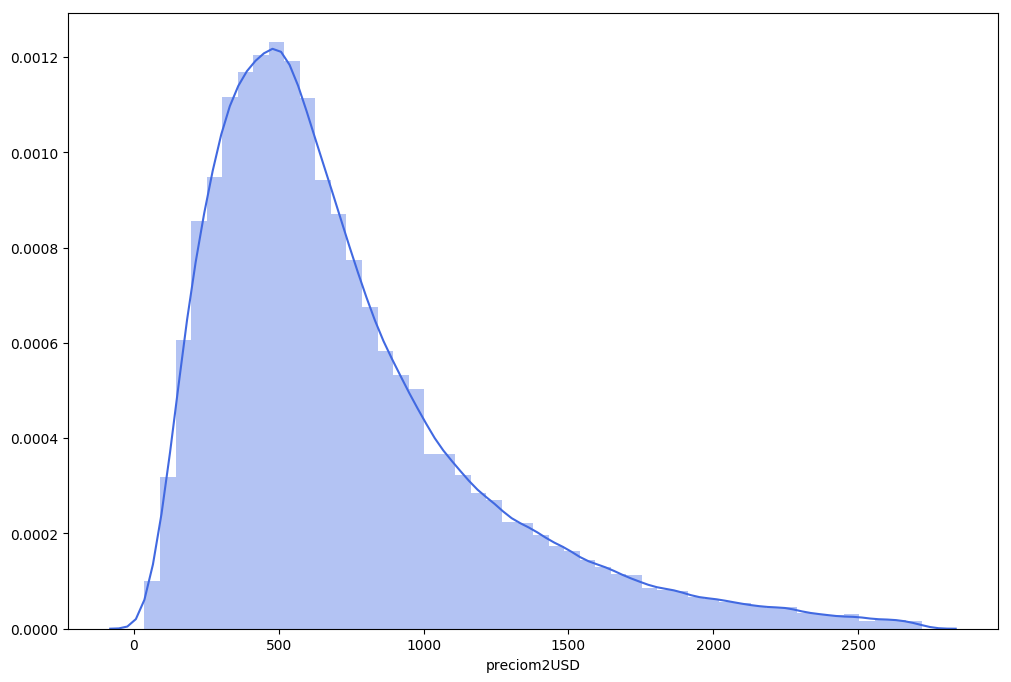

In [13]:
sns.distplot(df_filtrado['preciom2USD'], color='royalblue');

Luego del filtrado nos quedó una distribución más uniforme.

In [14]:
 print(f'Eliminamos {len(df) - len(df_filtrado)} propiedades')

Eliminamos 2402 propiedades


Como vamos a hacer un analisis por ciudades, revisamos tener un número considerable de propiedades por ciudad, para no caer en un análisis basado en muy pocas publicaciones.

In [15]:
props_por_ciudades = df_filtrado.groupby(['provincia', 'ciudad']).agg({'preciom2USD':'mean', 'id': 'count'}).reset_index()\
                .rename(columns={'preciom2USD': 'avg preciom2USD', 'id':'cantidad'})
props_por_ciudades.describe().T

,count,mean,std,min,25%,50%,75%,max
avg preciom2USD,892.0,478.413606,320.118485,36.0,294.056373,408.315313,572.784314,2708.333333
cantidad,892.0,265.957399,1069.092817,1.0,1.000000,4.000000,26.250000,12631.000000


In [16]:
props_por_ciudades = props_por_ciudades.loc[props_por_ciudades['cantidad'] >= 25]

props_por_ciudades.describe().T

,count,mean,std,min,25%,50%,75%,max
avg preciom2USD,228.0,514.197529,215.230889,203.753498,372.058233,463.61819,586.860684,1586.80755
cantidad,228.0,1027.697368,1924.381809,25.000000,57.750000,238.00000,1027.250000,12631.00000


In [17]:
print(f'Luego de filtrar ciudades con pocas publicaciones, me quedan {props_por_ciudades.cantidad.sum()} propiedades')
print(f'Representa el {((props_por_ciudades.cantidad.sum() / len(df))):.3f} del dataset')

Luego de filtrar ciudades con pocas publicaciones, me quedan 234315 propiedades
Representa el 0.976 del dataset


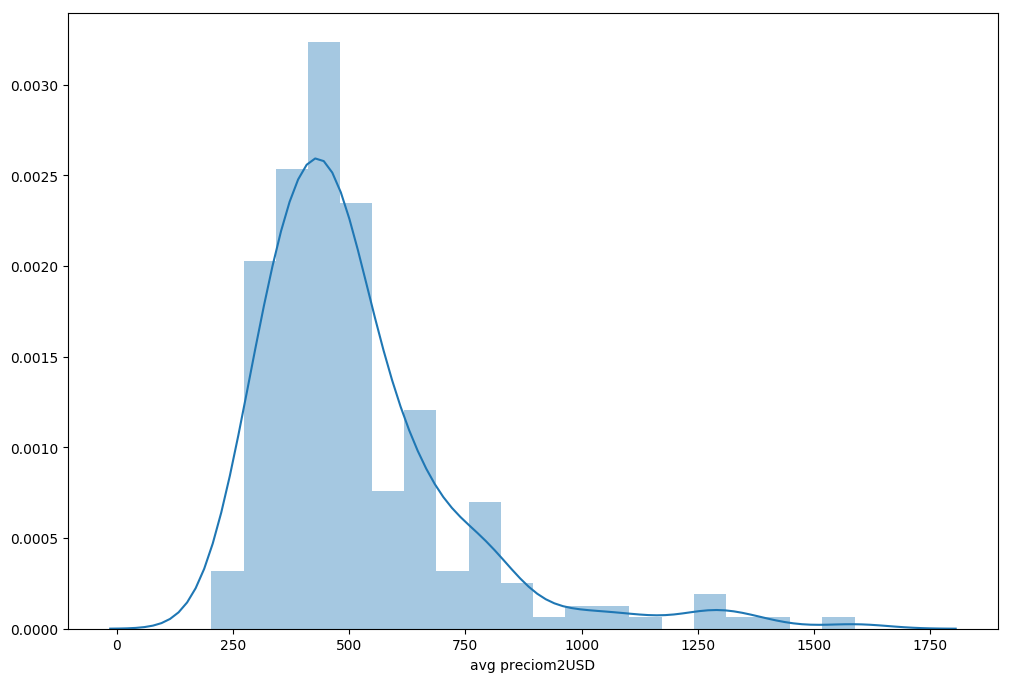

In [18]:
sns.distplot(props_por_ciudades['avg preciom2USD'])

In [19]:
df = df_filtrado
del df_filtrado

## Top 10 provincias con el metro cuadrado más caro

In [20]:
media_m2_por_provincia = props_por_ciudades.groupby('provincia').agg({'avg preciom2USD': 'mean', 'cantidad':'sum'})\
                        .reset_index().rename(columns={'avg preciom2USD': 'avg precio por m2 en USD'})\
                        .sort_values('avg precio por m2 en USD', ascending=False)

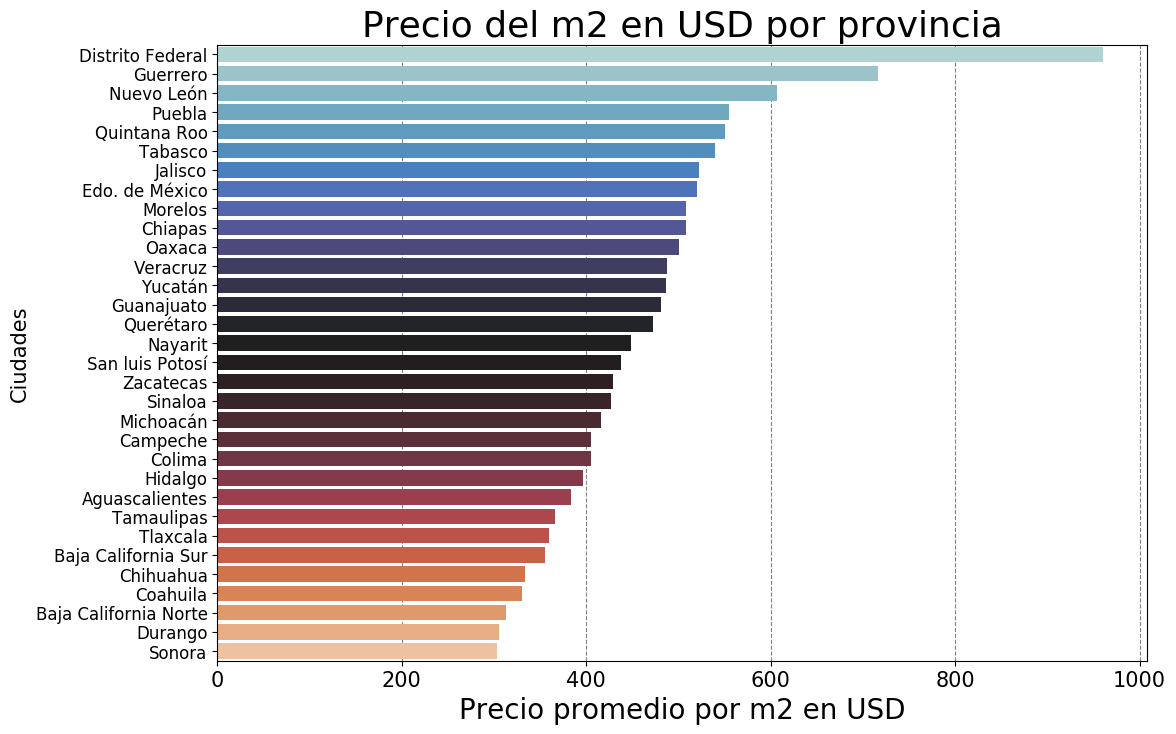

In [21]:
ax = sns.barplot(x=media_m2_por_provincia['avg precio por m2 en USD'], y=media_m2_por_provincia['provincia'], palette='icefire', orient='h')
ax.set_ylabel('Ciudades', fontsize=15)
ax.set_xlabel('Precio promedio por m2 en USD', fontsize=20)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=15)
ax.grid(linestyle='dashed', color='gray')
ax.yaxis.grid(False)
ax.set_axisbelow(True)
ax.set_title('Precio del m2 en USD por provincia', fontsize=26);

## Top 15 ciudades con el metro cuadrado más caro

In [22]:
props_por_ciudades['ciudad-provincia'] = props_por_ciudades[['ciudad', 'provincia']].apply(lambda x: ', '.join(x), axis=1)

In [23]:
media_m2_por_ciudad = props_por_ciudades.rename(columns={'avg preciom2USD': 'avg precio por m2 en USD'})\
                        .sort_values('avg precio por m2 en USD', ascending=False)

In [24]:
def plot_ciudades(df, strtitle):
    ax = sns.barplot(x=df['avg precio por m2 en USD'], y=df['ciudad-provincia'], palette='icefire', orient='h')
    ax.set_ylabel('Ciudades', fontsize=20)
    ax.set_xlabel('Precio promedio por m2 en USD', fontsize=20)
    ax.tick_params(axis='y', labelsize=12)
    ax.tick_params(axis='x', labelsize=15)
    ax.grid(linestyle='dashed', color='gray')
    ax.yaxis.grid(False)
    ax.set_axisbelow(True)
    ax.set_title(f'Las 15 ciudades con el metro cuadrado más {strtitle}', fontsize=26);

In [25]:
top_15_m2_por_ciudad = media_m2_por_ciudad.head(15)

top_15_m2_por_ciudad

,provincia,ciudad,avg precio por m2 en USD,cantidad,ciudad-provincia
508,Nuevo León,San Pedro Garza García,1586.807550,1405,"San Pedro Garza García, Nuevo León"
111,Distrito Federal,Miguel Hidalgo,1390.249981,5254,"Miguel Hidalgo, Distrito Federal"
103,Distrito Federal,Benito Juárez,1332.248400,10719,"Benito Juárez, Distrito Federal"
106,Distrito Federal,Cuauhtémoc,1278.920276,6096,"Cuauhtémoc, Distrito Federal"
105,Distrito Federal,Cuajimalpa de Morelos,1276.653704,2931,"Cuajimalpa de Morelos, Distrito Federal"
101,Distrito Federal,Alvaro Obregón,1260.855286,6443,"Alvaro Obregón, Distrito Federal"
165,Edo. de México,Huixquilucan,1143.300599,5691,"Huixquilucan, Edo. de México"
110,Distrito Federal,La Magdalena Contreras,1090.656471,1864,"La Magdalena Contreras, Distrito Federal"
104,Distrito Federal,Coyoacán,1056.886853,5200,"Coyoacán, Distrito Federal"
589,Puebla,Ocoyucan,987.685811,35,"Ocoyucan, Puebla"


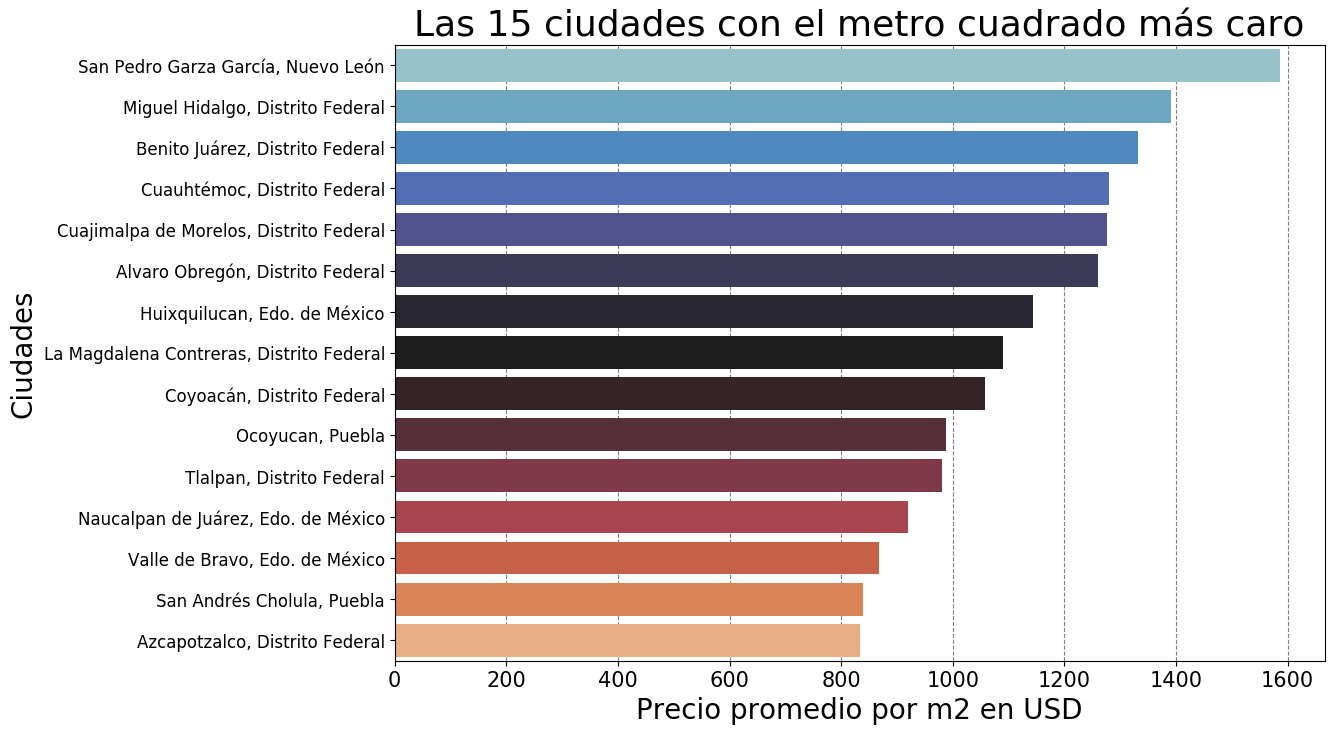

In [26]:
plot_ciudades(top_15_m2_por_ciudad, 'caro')

In [27]:
bottom_15_m2_por_ciudad = media_m2_por_ciudad.tail(15)

bottom_15_m2_por_ciudad

,provincia,ciudad,avg precio por m2 en USD,cantidad,ciudad-provincia
664,Sinaloa,Ahome,298.804216,150,"Ahome, Sinaloa"
843,Yucatán,Conkal,295.522442,245,"Conkal, Yucatán"
682,Sonora,Cajeme,293.051115,161,"Cajeme, Sonora"
21,Campeche,Campeche,288.634967,147,"Campeche, Campeche"
87,Coahuila,Ramos Arizpe,287.979922,286,"Ramos Arizpe, Coahuila"
314,Hidalgo,Tizayuca,284.923835,221,"Tizayuca, Hidalgo"
229,Edo. de México,Valle de Chalco Solidaridad,284.805465,83,"Valle de Chalco Solidaridad, Edo. de México"
100,Colima,Villa de Alvarez,280.200208,284,"Villa de Alvarez, Colima"
66,Chihuahua,Juárez,278.217778,618,"Juárez, Chihuahua"
11,Baja California Norte,Mexicali,275.898583,236,"Mexicali, Baja California Norte"


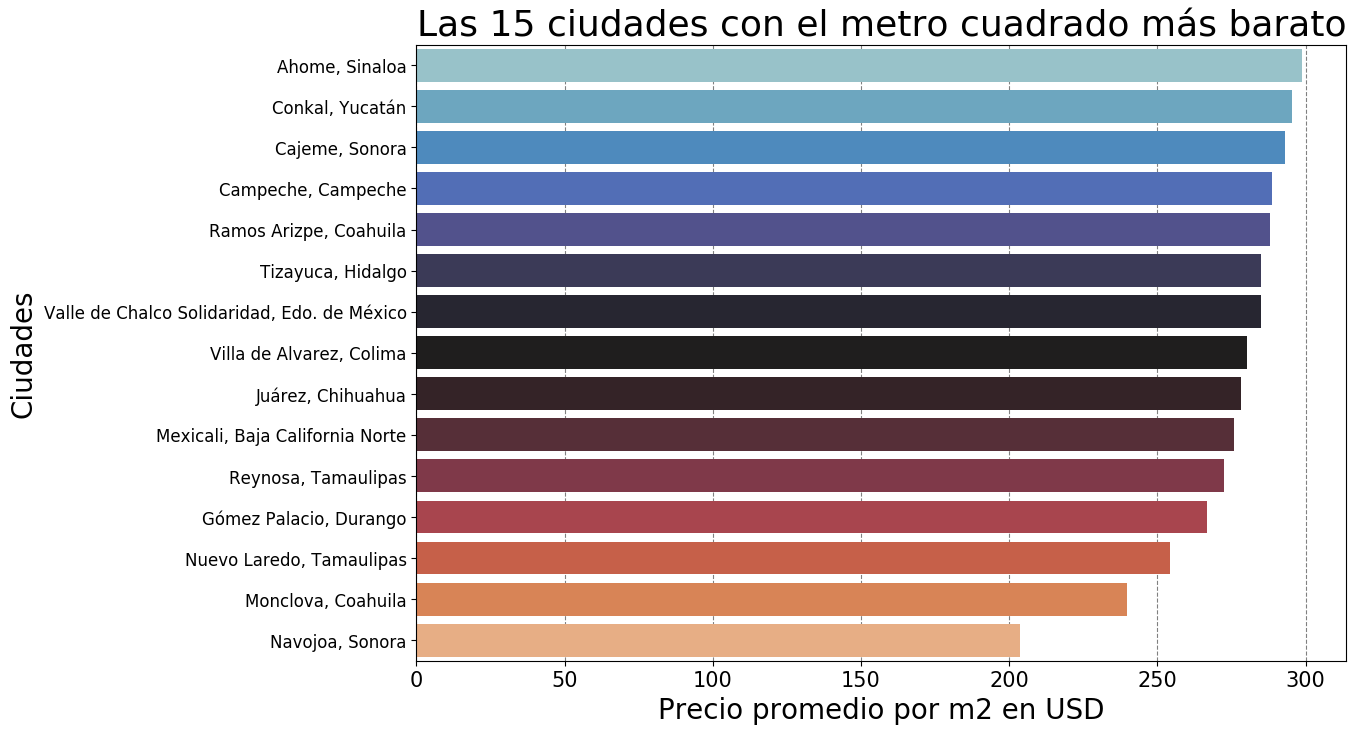

In [28]:
plot_ciudades(bottom_15_m2_por_ciudad, 'barato')

Vemos que las ciudades más caras se encuentran en la provincia más cara, lo cual tiene sentido ya que es la capital del país.

Además vemos una gran diferencia en el top, que parece amenguar luego de las primeras 5-9 ciudades.
Por otro lado, las ciudades más baratas no parecen seguir el mismo ritmo, ya que el precio por metro cuadrado es muy similar, salvo en la última, donde la diferencia es un poco más marcada.

Cabe mencionar que hay ciudades que fueron filtradas previamente ya que no tenian la suficiente cantidad de propiedades como para poder considerarlas en el análisis. Dichas ciudades tienen un precio inferior a USD100 por metro cuadrado, pero no es fidedigno ya que pueden ser casos aislados, como también ciudades con precios altísimos, alcanzando los USD16000 por metro cuadrado.